In [85]:
# Setting
## The path & packages
'upload'
#### Draft um Gitupload
!git init 
!git add . 
!git commit -m "5 Visualizing Differenes"
!git push

Bestehendes Git-Repository in /Users/mandoholzknecht/SE_Risk_Management/.git/ neuinitialisiert
[main e3a32ad] 5 Visualizing Differenes
 2 files changed, 1958 insertions(+), 1885 deletions(-)
Objekte aufzählen: 9, Fertig.
Zähle Objekte: 100% (8/8), Fertig.
Delta-Kompression verwendet bis zu 4 Threads.
Komprimiere Objekte: 100% (5/5), Fertig.
Schreibe Objekte: 100% (5/5), 239.11 KiB | 4.43 MiB/s, Fertig.
Gesamt 5 (Delta 3), Wiederverwendet 0 (Delta 0), Pack wiederverwendet 0
remote: Resolving deltas: 100% (3/3), completed with 2 local objects.
To https://github.com/danIBK/SE_Risk_Management.git
   28b35f9..e3a32ad  main -> main


In [2]:
#Comment out the other paths and comment in your path
#path = r'C:\Users\heuse\Desktop\SE_Risk_Management-1/' #Daniel Path
path = '/Users/mandoholzknecht/SE_Risk_Management/' # Path Mando
#path = 'C:/Users/Fabio/OneDrive/Dokumente/Uni Innsbruck/WS20/Applied risk mgmt/SE/Heusli/SE_Risk_Management/' # Path Fabio

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.anova as anova
import scipy as sci

from sklearn import metrics

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import datetime


# Loading the data

Loading the Training dataset + Test dataset

In [3]:
# use the realtive path finding
df_train = pd.read_csv(path + 'Training_Dataset.csv', sep=';', index_col=None)
df_test = pd.read_csv(path + 'Test_Dataset.csv', sep=';', index_col=0)


checking the data

In [4]:
df_train.head()

,id,default,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,...,bonds_payables_lt,total_equity,current_assets,monetary_current_assets,cash,trade_receivables_st,trade_receivables_lt,cf_operating,cf_investment,cf_financing
0,C_405,0,GmbH & Co. KG,12359,46730,1900,NaN,GKV,1.068738e+08,1.068738e+08,...,NaN,3.224471e+07,37831990.81,17111465.66,10297047.50,NaN,NaN,6.986094e+06,-1.112342e+06,-7520392.09
1,C_292,0,GmbH & Co. KG,10719,70101,1976,NaN,GKV,1.393869e+06,1.407889e+06,...,NaN,4.508026e+06,4669178.63,927837.74,926383.75,NaN,NaN,-4.343980e+06,1.174427e+06,1128108.08
2,C_746,0,GmbH,13353,87100,1962,323.0,GKV,3.864034e+06,7.597353e+05,...,NaN,5.164048e+04,28101189.79,11116958.92,9146283.79,617816.28,NaN,9.548544e+06,-7.536444e+06,-22026.07
3,C_838,0,AG,12529,68320,1972,1.0,GKV,4.384786e+06,4.405058e+06,...,NaN,1.182011e+07,8238473.86,7519183.22,6890565.23,319848.26,NaN,1.715799e+06,-6.561222e+05,-169655.66
4,C_495,0,Einzelfirma,12165,47730,1908,NaN,GKV,1.104478e+08,1.104478e+08,...,NaN,4.547445e+08,35465651.58,8545183.94,5036615.09,516646.73,NaN,1.301809e+08,-1.419776e+08,12567030.80


In [5]:
df_test.head(8)

,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,gross_profit,earn_from_op,...,bonds_payables_lt,total_equity,current_assets,monetary_current_assets,cash,trade_receivables_st,trade_receivables_lt,cf_operating,cf_investment,cf_financing
id,,,,,,,,,,,,,,,,,,,,,
C_411,GmbH,14089,69204,1986,NaN,GKV,728946.68,728946.68,209721.36,45390.50,...,NaN,NaN,64195.98,28659.19,5598.17,NaN,NaN,52632.64,-534.87,-5.457891e+04
C_896,GmbH,13127,87100,1992,181.0,GKV,708847.33,708847.33,738495.17,13017.29,...,NaN,442875.57,479144.25,452033.96,442835.62,NaN,NaN,-10575.21,-1295.42,-5.820000e-11
C_252,GmbH,14059,86101,1993,505.0,GKV,26025323.61,26015542.03,22022993.85,2086104.36,...,NaN,13733666.50,14504753.93,3441491.02,322075.13,3034766.29,NaN,2862349.65,-667342.46,-2.091456e+06
C_165,GmbH,10437,87100,1995,82.0,GKV,1105332.48,1105332.48,717405.05,88074.80,...,NaN,381990.95,371506.04,343269.12,256395.19,NaN,NaN,156251.71,-57344.11,-1.160000e-10
C_856,GmbH,14943,96090,2002,22.0,GKV,51995424.22,51979901.95,46420844.34,5956777.13,...,NaN,6828494.53,18909648.90,15619860.60,6720068.91,8847966.22,NaN,5696079.15,-1418555.39,-4.163971e+06
C_415,GmbH,10969,68321,2006,NaN,GKV,13597456.35,13597456.35,7667501.25,-109859.68,...,NaN,0.00,1273354.65,1277275.04,5848.43,136628.62,NaN,83600.84,1560281.10,-1.643803e+06
C_520,GmbH,10625,68100,2010,NaN,GKV,10365544.05,10365544.05,7931366.20,565338.94,...,NaN,8823433.07,7715921.82,7749440.79,6802934.01,855343.08,NaN,1051697.31,-366425.37,-5.398260e+03
C_127,GmbH,29308,87100,2007,NaN,GKV,10129943.12,10486827.90,5959584.15,435328.26,...,NaN,1990015.77,3451499.64,1352994.01,1349.09,986648.60,NaN,-56012.29,-533257.11,4.586848e+05


# Variables

## Renaming of some colums
We decided to not rename any varialbes

## Further variable coding
Transforming variables

### Transforming year_inc to age columns
Transforming the year of incorporation variable to two age variables: one numerical (age_num) one and one categorical one (age_cat). 

In [6]:
df_train['age_num'] = datetime.datetime.now().year - df_train["year_inc"]
df_train.sort_values(by="age_num",ascending=False).head(5)

,id,default,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,...,total_equity,current_assets,monetary_current_assets,cash,trade_receivables_st,trade_receivables_lt,cf_operating,cf_investment,cf_financing,age_num
572,C_482,0,Freiberufler,61169,49310,0,NaN,GKV,635769.95,635769.95,...,37125.13,299815.83,268452.30,49009.81,NaN,NaN,-212829.13,-1.750000e-10,9.460000e-11,2021
477,C_597,1,Freiberufler,32457,71113,0,NaN,GKV,241456.04,216900.58,...,514698.88,639035.00,639951.26,7466.24,24518.87,NaN,14391.18,-7.090000e-11,1.204280e+03,2021
272,C_543,0,AG,86150,68101,1464,NaN,GKV,73165008.12,73165008.12,...,7797900.20,29653971.68,11687193.17,3444440.58,4254958.92,NaN,12170860.85,-6.620784e+05,-2.560090e+05,557
249,C_105,0,AG,76185,70101,1856,NaN,GKV,53372139.09,53110170.33,...,7522638.74,31608245.57,26918553.04,19531832.78,6509382.04,NaN,-10483605.89,-1.015179e+07,3.198861e+07,165
531,C_711,0,GmbH & Co. KG,42651,32501,1857,63.0,GKV,2713538.03,2713538.03,...,330130.46,625173.80,462636.78,66853.99,281981.84,NaN,133580.07,-5.635444e+04,3.780000e-10,164


As we have some firms which are pretty old (some > 100 years) and two outliers (2020s) we can set their value to the e.g.: 95% quantile as this shouldn't change the meaning of the age variable that much. They are long on the market and it does not really matter if they are long on the market (e.g.: 100 years) or very very long in the business (eg: above 500 years). 

In [7]:
#take a look on the quantiles
quantiles = list()
for i in range(0,100,):
    quantiles.append(df_train["age_num"].quantile(i/100))

age_th = df_train["age_num"].quantile(0.99)

#replace outliers with 99% quantile
df_train.loc[df_train["age_num"] > age_th,"age_num"] = age_th

df_train.sort_values(by="age_num",ascending=False).head(10)

,id,default,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,...,total_equity,current_assets,monetary_current_assets,cash,trade_receivables_st,trade_receivables_lt,cf_operating,cf_investment,cf_financing,age_num
272,C_543,0,AG,86150,68101,1464,NaN,GKV,7.316501e+07,7.316501e+07,...,7.797900e+06,29653971.68,11687193.17,3444440.58,4254958.92,NaN,12170860.85,-6.620784e+05,-2.560090e+05,158.32
249,C_105,0,AG,76185,70101,1856,NaN,GKV,5.337214e+07,5.311017e+07,...,7.522639e+06,31608245.57,26918553.04,19531832.78,6509382.04,NaN,-10483605.89,-1.015179e+07,3.198861e+07,158.32
371,C_361,0,GmbH,21335,20520,1858,185.0,GKV,1.979305e+08,1.972723e+08,...,2.445527e+06,32809291.04,24618777.77,1012.13,24452421.93,NaN,11658956.29,-1.072492e+06,-1.088165e+07,158.32
572,C_482,0,Freiberufler,61169,49310,0,NaN,GKV,6.357699e+05,6.357699e+05,...,3.712513e+04,299815.83,268452.30,49009.81,NaN,NaN,-212829.13,-1.750000e-10,9.460000e-11,158.32
477,C_597,1,Freiberufler,32457,71113,0,NaN,GKV,2.414560e+05,2.169006e+05,...,5.146989e+05,639035.00,639951.26,7466.24,24518.87,NaN,14391.18,-7.090000e-11,1.204280e+03,158.32
283,C_519,0,GmbH,80807,18120,1862,NaN,GKV,1.560010e+06,4.462166e+06,...,3.912989e+05,1780853.40,507526.40,13989.13,NaN,NaN,-115009.30,-6.533309e+04,2.707314e+05,158.32
531,C_711,0,GmbH & Co. KG,42651,32501,1857,63.0,GKV,2.713538e+06,2.713538e+06,...,3.301305e+05,625173.80,462636.78,66853.99,281981.84,NaN,133580.07,-5.635444e+04,3.780000e-10,158.32
454,C_259,0,Freiberufler,44141,94110,1863,140.0,GKV,3.584665e+05,3.584665e+05,...,1.871424e+05,70476.90,61735.26,41618.21,NaN,NaN,22009.92,-1.400000e+05,1.307238e+05,158.00
165,C_347,0,GmbH,57072,25993,1866,116.0,GKV,2.645000e+05,2.645000e+05,...,1.834052e+04,186602.25,172230.65,1434.82,NaN,NaN,1484.67,4.500000e+01,0.000000e+00,155.00
445,C_019,0,AG,33689,70109,1870,107.0,GKV,2.432905e+06,2.432905e+06,...,-3.640000e-12,340903.37,340903.37,340903.37,NaN,NaN,1933900.10,0.000000e+00,-2.050780e+06,151.00


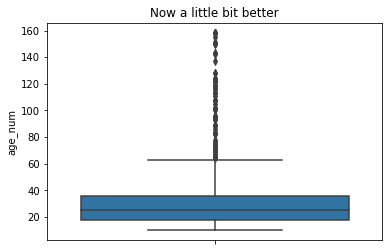

In [8]:
sns.boxplot(y=df_train["age_num"]).set_title("Now a little bit better");

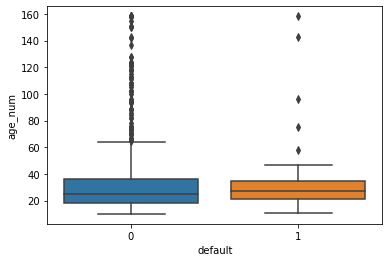

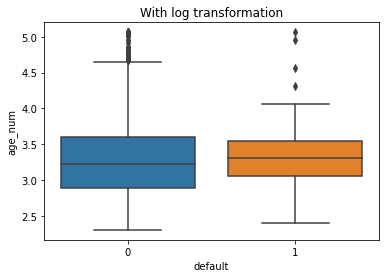

<Figure size 432x288 with 0 Axes>

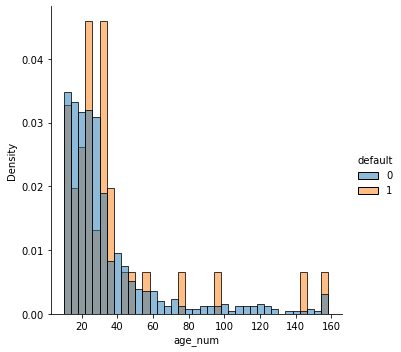

In [9]:
sns.boxplot(y="age_num",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["age_num"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="age_num",hue="default",stat="density",common_norm=False);

In [10]:
df_train["age_quartile"] = pd.qcut(df_train["age_num"],10)
pd.crosstab(df_train["default"],df_train["age_quartile"])

age_quartile,"(9.999, 13.0]","(13.0, 16.0]","(16.0, 20.0]","(20.0, 23.0]","(23.0, 25.0]","(25.0, 29.0]","(29.0, 32.0]","(32.0, 42.4]","(42.4, 66.0]","(66.0, 158.32]"
default,,,,,,,,,,
0,69,61,75,78,36,67,64,54,65,62
1,5,1,3,6,4,0,7,5,3,4


In [11]:
mdl = sm.Logit.from_formula('default ~ age_num + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.000   
Dependent Variable: default          AIC:              295.6596
Date:               2021-01-02 15:08 BIC:              304.6712
No. Observations:   669              Log-Likelihood:   -145.83 
Df Model:           1                LL-Null:          -145.89 
Df Residuals:       667              LLR p-value:      0.72592 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
----------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
----------------------------------------------------------------
Intercept  -2.8782    0.2572  -11.1898  0.0000  -3.3823  -2.3740
age_num     0.0019    0.0054    0.3576  0.7206  -0.0087   0.0126



In [12]:
#Flave - habe age cat so transformiert, dass man sie unten in der regression benutzen kann
df_train["age_cat"] = np.select([
     df_train['age_num'].between(0, 4, inclusive=True),
     df_train['age_num'].between(5, 9, inclusive=True),
     df_train['age_num'].between(10, 29, inclusive=True),
     df_train['age_num'].between(30, np.inf, inclusive=True)], 
    [1,2,3,4])

pd.crosstab(df_train["default"],df_train["age_cat"])

age_cat,3,4
default,,
0,386,245
1,19,19


In [13]:
# Mando
# df_train["age_cat"] = np.select([
#      df_train['age_num'].between(0, 19, inclusive=True),
#      df_train['age_num'].between(20, 29, inclusive=True),
#      df_train['age_num'].between(30, 39, inclusive=True),
#      df_train['age_num'].between(40, 49, inclusive=True),
#      df_train['age_num'].between(50, 59, inclusive=True),
#      df_train['age_num'].between(60, np.inf, inclusive=True)], 
#     ['10-19','20-29','30-39','40-49','50-59','>59'],)

# pd.crosstab(df_train["default"],df_train["age_cat"])

In [14]:
mdl = sm.Logit.from_formula('default ~ age_cat + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.006   
Dependent Variable: default          AIC:              293.9493
Date:               2021-01-02 15:08 BIC:              302.9609
No. Observations:   669              Log-Likelihood:   -144.97 
Df Model:           1                LL-Null:          -145.89 
Df Residuals:       667              LLR p-value:      0.17575 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
Intercept   -4.3751    1.1807  -3.7056  0.0002  -6.6892  -2.0611
age_cat      0.4546    0.3346   1.3587  0.1742  -0.2012   1.1103



In [15]:
catvar = [i for i in list(df_train.columns) if df_train[i].dtype=='O']

for i in catvar:
    tmp1 = pd.crosstab(df_train['default'], df_train[i]).apply(lambda x: np.round(x/x.sum() * 100,2)).T.sort_values(by = i ,ascending=False)
    tmp2 = pd.crosstab(df_train['default'], df_train[i]).T.rename(columns={False: 'N_False', True: 'N_True'})
    tmp3 = pd.DataFrame(tmp2.apply(sum, axis=1), columns=['N'])
    tmp4 = tmp3.apply(lambda x: np.round(x/x.sum() * 100,2)).rename(columns={'N': 'N_Perc'})
    tmp = tmp1.join(tmp2).join(tmp3).join(tmp4)
    print('====================================================')
    print('Variable: ',i)
    print('---------------------------------------------------')
    print(tmp)
    print()
    del tmp1, tmp2, tmp3, tmp4, tmp

Variable:  id
---------------------------------------------------
           0    1  N_False  N_True  N  N_Perc
id                                           
C_995  100.0  0.0        1       0  1    0.15
C_994  100.0  0.0        1       0  1    0.15
C_992  100.0  0.0        1       0  1    0.15
C_990  100.0  0.0        1       0  1    0.15
C_986  100.0  0.0        1       0  1    0.15
...      ...  ...      ...     ... ..     ...
C_006  100.0  0.0        1       0  1    0.15
C_004  100.0  0.0        1       0  1    0.15
C_002  100.0  0.0        1       0  1    0.15
C_001  100.0  0.0        1       0  1    0.15
C_000  100.0  0.0        1       0  1    0.15

[669 rows x 6 columns]

Variable:  legal_form
---------------------------------------------------
                              0      1  N_False  N_True    N  N_Perc
legal_form                                                          
Verein                   100.00   0.00        1       0    1    0.15
Sonst. Gewerbetreibende   88.2

# Understanding your data


## Univartiate descriptive anaylsis

The datatype of the variables is important as in dermines how you have to look at the data

In [16]:
catvar = [i for i in list(df_train.columns) if df_train[i].dtype=='O']
catvar # categorial variables

['id', 'legal_form', 'type_pl']

In [17]:
numvar = [i for i in list(df_train.columns) if df_train[i].dtype in ['float64','int64']]
numvar # numberical variables

['default',
 'zip_code',
 'sector',
 'year_inc',
 'count_emp',
 'sales',
 'gross_performance',
 'gross_profit',
 'earn_from_op',
 'fin_result',
 'oth_interest_inc',
 'oth_interest_exp',
 'result_from_ord_bus',
 'total_result',
 'annual_profit',
 'total_assets',
 'total_liabilities_st',
 'total_liabilities_mt',
 'total_liabilities_lt',
 'bank_liabilities_st',
 'bank_liabilities_mt',
 'bank_liabilities_lt',
 'trade_payables_st',
 'trade_payables_mt',
 'trade_payables_lt',
 'bonds_payables_st',
 'bonds_payables_mt',
 'bonds_payables_lt',
 'total_equity',
 'current_assets',
 'monetary_current_assets',
 'cash',
 'trade_receivables_st',
 'trade_receivables_lt',
 'cf_operating',
 'cf_investment',
 'cf_financing',
 'age_num',
 'age_cat']

## Missing values

Overview of missing values in the data

In [18]:
df_train.isnull().sum().sort_values(ascending=False)

bonds_payables_lt          669
bonds_payables_st          669
trade_payables_lt          665
bonds_payables_mt          664
trade_payables_mt          648
trade_receivables_lt       645
bank_liabilities_lt        545
bank_liabilities_mt        483
trade_receivables_st       355
count_emp                  353
bank_liabilities_st        352
trade_payables_st          143
oth_interest_inc           127
oth_interest_exp            62
cash                        32
fin_result                  22
total_equity                21
gross_profit                 7
gross_performance            7
result_from_ord_bus          1
total_assets                 1
earn_from_op                 1
annual_profit                1
sales                        1
current_assets               1
cf_operating                 1
cf_investment                1
cf_financing                 1
year_inc                     0
sector                       0
zip_code                     0
type_pl                      0
legal_fo

In [19]:
df_test.isnull().sum().sort_values(ascending=False)

bonds_payables_lt          330
bonds_payables_st          330
trade_payables_lt          330
bonds_payables_mt          329
trade_payables_mt          322
trade_receivables_lt       320
bank_liabilities_lt        250
bank_liabilities_mt        230
count_emp                  179
bank_liabilities_st        172
trade_receivables_st       169
trade_payables_st           65
oth_interest_inc            62
oth_interest_exp            23
cash                        18
total_equity                 9
fin_result                   8
gross_performance            3
gross_profit                 3
cf_investment                1
cf_operating                 1
cf_financing                 1
earn_from_op                 0
year_inc                     0
sector                       0
type_pl                      0
sales                        0
zip_code                     0
total_liabilities_mt         0
result_from_ord_bus          0
total_result                 0
annual_profit                0
total_as

## Univariate Analysis

### Univariate Logit Regressions
See the significance of every variable possible in the training set in an univariate setting and where NAs are dropped. We also ordered them according to their p values. Important to note here is the p value is not a KO-criteria for us. Also we do these regressions before data cleansing, which is another important thing to consider. The aim of this is only to see if their is some clear evidence for significant features in the data in the first place.

In [20]:
col_list = df_train.columns[2:]
col_list
dictionary_logit = dict()

for i in range(0,len(col_list)):
    try:
        univ_var = pd.concat((df_train['default'],df_train[col_list[i]]),axis=1)
        y = univ_var["default"]
        X = univ_var.iloc[:,1]
        X = sm.add_constant(X)
        model = sm.Logit(y,X,missing="drop").fit(disp=False,maxiter=100)
        print(model.summary2()) #comment that out if you don't want to see the regression summary
        pvalue = model.pvalues[1]
        dictionary_logit[col_list[i]] = (pvalue,univ_var.iloc[:,1].isnull().sum())
    except:
        continue

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.004   
Dependent Variable: default          AIC:              294.4736
Date:               2021-01-02 15:08 BIC:              303.4851
No. Observations:   669              Log-Likelihood:   -145.24 
Df Model:           1                LL-Null:          -145.89 
Df Residuals:       667              LLR p-value:      0.25258 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
const       -3.1658    0.3671  -8.6249  0.0000  -3.8852  -2.4464
zip_code     0.0000    0.0000   1.1393  0.2546  -0.0000   0.0000

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.000   
Dependent Variable: 

                         Results: Logit
Model:                Logit            Pseudo R-squared: 0.004   
Dependent Variable:   default          AIC:              276.0375
Date:                 2021-01-02 15:08 BIC:              284.8545
No. Observations:     607              Log-Likelihood:   -136.02 
Df Model:             1                LL-Null:          -136.61 
Df Residuals:         605              LLR p-value:      0.27642 
Converged:            1.0000           Scale:            1.0000  
No. Iterations:       8.0000                                     
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const            -2.7128   0.1780 -15.2400 0.0000 -3.0617 -2.3639
oth_interest_exp -0.0000   0.0000  -0.7494 0.4536 -0.0000  0.0000

                           Results: Logit
Model:                 Logit             Pseudo R-squared: 

                           Results: Logit
Model:                 Logit             Pseudo R-squared:  0.001   
Dependent Variable:    default           AIC:               178.8387
Date:                  2021-01-02 15:08  BIC:               186.3565
No. Observations:      317               Log-Likelihood:    -87.419 
Df Model:              1                 LL-Null:           -87.488 
Df Residuals:          315               LLR p-value:       0.71124 
Converged:             1.0000            Scale:             1.0000  
No. Iterations:        6.0000                                       
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
const               -2.4872   0.2243 -11.0902 0.0000 -2.9268 -2.0477
bank_liabilities_st  0.0000   0.0000   0.3837 0.7012 -0.0000  0.0000

                          Results: Logit
Model:             

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.058     
Dependent Variable: default          AIC:              264.7221  
Date:               2021-01-02 15:08 BIC:              273.6356  
No. Observations:   637              Log-Likelihood:   -130.36   
Df Model:           1                LL-Null:          -138.40   
Df Residuals:       635              LLR p-value:      6.0787e-05
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     12.0000                                      
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const    -2.4119     0.1926   -12.5247   0.0000   -2.7893   -2.0344
cash     -0.0000     0.0000    -2.0864   0.0369   -0.0000   -0.0000

                           Results: Logit
Model:                Logit              Pseudo R

In [21]:
pd.DataFrame.from_dict(dictionary_logit,orient="index",columns=['P-Value','NAs']).sort_values(by="P-Value")

,P-Value,NAs
cash,0.036941,32
year_inc,0.055606,0
total_equity,0.109640,21
gross_profit,0.153112,7
age_cat,0.174240,0
cf_operating,0.242710,1
bank_liabilities_lt,0.245019,545
zip_code,0.254582,0
total_liabilities_lt,0.259686,0
cf_investment,0.328421,1


Speaking in an univariate context, what we can see here is that no variable shows a very strong significance in the univariate logistic regression with the default variable as dependent variable. Also some variables can be disregarded as their numerical value makes no sense (e.g.: year_inc).  Thus we can argue, that a focus on economic reasoning instead of p-values in the univariate context is a better way to go. 

### Mann-Whitney U Test
Also we perform a Mann-Whitney U Test for all variables to see if there is a difference in those variables between default and non default firms.

In [22]:
col_list

dictionary_mannu = dict()

for i in range(0,len(col_list)):
    try: 
        group_default = df_train[df_train["default"]==1][col_list[i]]
        group_non_default = df_train[df_train["default"]==0][col_list[i]]
        test_stat, pvalue = sci.stats.mannwhitneyu(group_default,group_non_default)
        dictionary_mannu[col_list[i]] = test_stat, pvalue, df_train[col_list[i]].isnull().sum()
    except:
        continue

#sns.boxplot(x="default",y=np.log(df_train[col_list[6]]),data=df_train)

In [23]:
pd.DataFrame.from_dict(dictionary_mannu,orient="index",
                       columns=['Test statistic','P-Value','NAs']).sort_values(by="P-Value")

,Test statistic,P-Value,NAs
cash,7716.0,0.000111,32
trade_receivables_lt,8339.0,0.000805,645
trade_payables_lt,8430.0,0.001051,665
bonds_payables_st,8471.0,0.001183,669
bonds_payables_lt,8471.0,0.001183,669
monetary_current_assets,8712.0,0.002315,0
bonds_payables_mt,8855.0,0.003383,664
result_from_ord_bus,8910.0,0.003900,1
total_result,8993.0,0.004814,0
trade_payables_mt,9057.0,0.005645,648


# Variables

In [24]:
# # drop companies with to many null columns 
df_train = df_train.loc[df_train["id"] != 'C_620'] 
# --> das ist gar nicht gut, ich brauche hier einen loop der entweder alle comps mit mehr als x Spalten NaNs dropt
# oder loop der alle corr Spalten checkt und wenn NaN dann drop comp

## 1. Single independent variables

1. Ebit

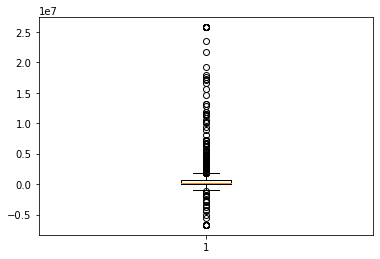

In [25]:
df_train['ebit'] = sci.stats.mstats.winsorize(df_train['earn_from_op'], limits =[0.015, 0.015])
#df_train['ebit'] = df_train['earn_from_op']
plt.boxplot(df_train.ebit)
plt.show()

2. Profit

0
count    668.000000
mean      14.651154
std        2.063522
min        5.502890
25%       13.302821
50%       14.547752
75%       16.141676
max       20.656471
Name: profit, dtype: float64
14.547752    6
15.190638    1
15.329032    1
16.077857    1
12.590816    1
            ..
16.592209    1
14.366901    1
14.124565    1
15.795753    1
17.251827    1
Name: profit, Length: 663, dtype: int64


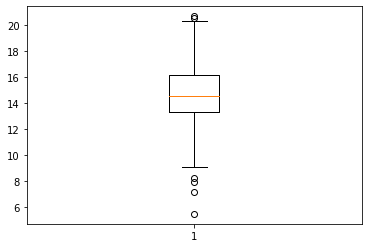

In [26]:
gropro = df_train['gross_profit'].replace(np.nan, np.quantile(df_train['gross_profit'].dropna(),.5))
df_train['profit'] = np.log(gropro)
print(df_train['profit'].isnull().sum())
print(df_train['profit'].describe())
print(df_train['profit'].value_counts())
plt.boxplot(df_train['profit']) 
plt.show()

3. Cash

0
count    668.000000
mean      11.711042
std        2.895822
min        1.128171
25%        9.919323
50%       11.840634
75%       13.793730
max       19.361787
Name: cash, dtype: float64
11.840634    32
14.919227     1
6.763446      1
15.076077     1
15.910902     1
             ..
13.137611     1
15.266656     1
12.598828     1
5.768290      1
12.068686     1
Name: cash, Length: 637, dtype: int64


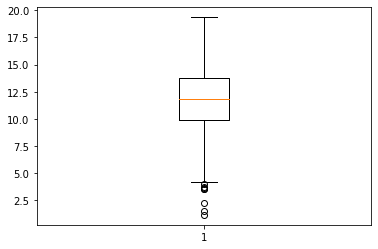

In [27]:
df_train['cash'] = df_train['cash'].replace(np.nan, np.quantile(df_train['cash'].dropna(),.5))
#df_train['cash'] = sci.stats.mstats.winsorize(df_train['cash'], limits =[0.0, 0.005]) #entweder winsorize oder log (log denke besser)
df_train['cash'] = np.log(df_train['cash'])
print(df_train['cash'].isnull().sum())
print(df_train['cash'].describe())
print(df_train['cash'].value_counts())
plt.boxplot(df_train['cash']) 
plt.show()

## 2. Predict NaN for total equity
Source: https://towardsdatascience.com/predict-missing-values-in-the-dataset-897912a54b7b


Check for correlation to get relevant variables for regression

In [28]:
print('corr total eqity x total result: ' + str(df_train['total_equity'].corr(df_train['total_result'])))
print('corr total eqity x total assets: ' + str(df_train['total_equity'].corr(df_train['total_assets'])))
print('corr total eqity x operating cash flow: ' + str(df_train['total_equity'].corr(df_train['cf_operating'])))


corr total eqity x total result: 0.8677428854384167
corr total eqity x total assets: 0.7973909460204517
corr total eqity x operating cash flow: 0.8165188337701584


Split training and prediction dataset

In [29]:
cols = ['total_result', 'total_assets', 'cf_operating', 'total_equity']
df = df_train[cols]
test_df = df[df['total_equity'].isnull()]
df = df.dropna()

y_train = df['total_equity']
X_train = df.drop('total_equity', axis=1)
X_test = test_df.drop('total_equity', axis=1)

Train model to fit dataset and predict missing values from column total equity and replace them

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

[ 804154.57039481  826770.37433689  750108.44000769 2034060.76386614
  906958.71620785  757800.98860179  694739.75133315  777633.44217635
 1031927.82907442  707250.99306169  798206.66922867  753555.95951813
  938481.58223852  838818.88678532  728338.08877872  658229.22939661
  757045.94589861 3707034.78681171  430054.79880165  809294.10299163]


Replace the missing values with predicted values

In [31]:
df_train.loc[df_train.total_equity.isnull(), 'total_equity'] = y_pred
print(df_train['total_equity'].isnull().sum())
print(df_train['total_equity'].describe())
print(df_train['total_equity'].value_counts()) 

0
count    6.680000e+02
mean     2.257491e+07
std      1.437662e+08
min     -1.120000e-08
25%      9.821184e+04
50%      6.330711e+05
75%      4.242629e+06
max      2.883814e+09
Name: total_equity, dtype: float64
 0.000000e+00    21
 2.500000e+04     5
 3.640000e-12     5
 1.460000e-11     3
-3.640000e-12     3
                 ..
-5.820000e-11     1
 2.439935e+06     1
 9.888687e+06     1
 5.076543e+05     1
 1.367994e+07     1
Name: total_equity, Length: 631, dtype: int64


## 3. Financial ratios

3.1. working capital ratio = current assets/current liabilities (liquidity ratios measuring a companies ability to meet its short term dept obligations)

0      5.142587
1      0.663710
2      3.328108
3      3.193566
4      0.102055
         ...   
664    0.835583
665    1.213142
666    0.041927
667    0.615002
668    1.006126
Name: wc_ratio, Length: 668, dtype: float64
count    668.000000
mean       1.851649
std        2.259928
min        0.000933
25%        0.785477
50%        1.177708
75%        1.929122
max       12.899702
Name: wc_ratio, dtype: float64


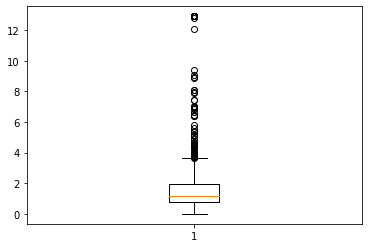

In [32]:
#create a column with total liabilities
df_train['total_liabilities'] = df_train['total_liabilities_st'] + df_train['total_liabilities_mt'] + df_train['total_liabilities_lt']

df_train['wc_ratio'] = df_train['current_assets']/df_train['total_liabilities_st']
df_train['wc_ratio'] = sci.stats.mstats.winsorize(df_train['wc_ratio'], limits =[0, 0.02])
print(df_train.wc_ratio)
print(df_train.wc_ratio.describe())
plt.boxplot(df_train.wc_ratio)
plt.show()

3.2. operating profit ratio = operating cf/sales

In [33]:
cf_pos = np.where(df_train['cf_operating'] > 1, df_train['cf_operating'], 0)
cf_neg = np.where(df_train['cf_operating'] < -1, df_train['cf_operating'], 0)
df_train['ocf_ratio'] = df_train['cf_operating']/df_train['sales']
# winsorize ocf
df_train['ocf_ratio'] = sci.stats.mstats.winsorize(ocf, limits =[0.01, 0.02])
plt.boxplot(df_train.ocf_ratio)
plt.show()

NameError: name 'ocf' is not defined

Next we use two solvency ratio (measure a companies ability to meet its long term dept obligations) that we will weight as one to circumvent overfitting

3.3. equity ratio = tot equity/total assets

0      0.738567
1      0.389698
2      0.000937
3      0.592532
4      0.417496
         ...   
664    0.182336
665    0.341823
666    0.000000
667    0.000000
668    0.040729
Name: equity_ratio, Length: 668, dtype: float64
count    668.000000
mean       0.349068
std        0.304380
min        0.000000
25%        0.106484
50%        0.284663
75%        0.506833
max        1.424661
Name: equity_ratio, dtype: float64
0.000000    46
1.424661    14
0.404251     1
0.972960     1
0.389698     1
            ..
0.281173     1
0.794892     1
0.026319     1
0.603595     1
0.282468     1
Name: equity_ratio, Length: 610, dtype: int64


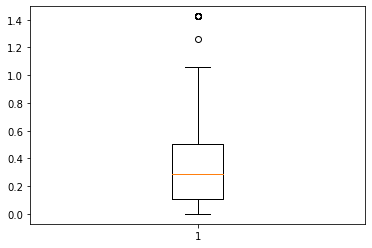

In [34]:
df_train['equity_ratio'] = np.where(df_train['total_equity'] > 1, df_train['total_equity']/df_train['total_assets'], 0)
df_train['equity_ratio'] = sci.stats.mstats.winsorize(df_train['equity_ratio'], limits =[0.0, 0.02])
print(df_train.equity_ratio)
print(df_train.equity_ratio.describe())
print(df_train.equity_ratio.value_counts()) #46 nulls
plt.boxplot(df_train.equity_ratio)
plt.show()

3.4. debt to equity ratio = total dept/total equity

count    668.000000
mean       0.836725
std        1.754353
min       -4.304558
25%       -0.113928
50%        0.646118
75%        1.678663
max        9.333686
Name: debt_to_equity, dtype: float64
0     -1.042864
1      0.445033
2      5.098516
3     -1.442608
4      0.284622
         ...   
664    1.500602
665    0.655182
666    0.000000
667    0.000000
668    3.158769
Name: debt_to_equity, Length: 668, dtype: float64
 0.000000    46
 0.696812     1
 0.644870     1
-0.412104     1
 0.480083     1
             ..
-0.592875     1
 1.521916     1
 0.089532     1
 1.792278     1
-1.399804     1
Name: debt_to_equity, Length: 623, dtype: int64


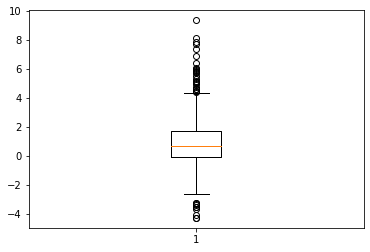

In [35]:
df_train['debt_to_equity'] = np.where(df_train['total_equity'] > 1, df_train['total_liabilities']/df_train['total_equity'], 0)
#df_train['debt_to_equity'] = sci.stats.mstats.winsorize(df_train['debt_to_equity'], limits =[0.0, 0.02])
df_train['debt_to_equity'] = np.where(df_train['debt_to_equity'] > 0, np.log(df_train['debt_to_equity']), 0)

print(df_train.debt_to_equity.describe())
print(df_train.debt_to_equity)
print(df_train.debt_to_equity.value_counts()) #46 nulls
plt.boxplot(df_train.debt_to_equity)
plt.show()

3.5. Return on Assets

count    6.680000e+02
mean     5.750400e-02
std      1.393243e-01
min     -7.285700e-01
25%      9.968144e-17
50%      2.750187e-02
75%      8.735437e-02
max      8.854164e-01
Name: roa, dtype: float64
0      1.494000e-01
1      9.655827e-02
2     -2.540307e-17
3      2.980723e-02
4      2.607926e-02
           ...     
664   -2.783753e-03
665    1.555806e-01
666    1.289209e-02
667    6.375280e-02
668    1.757980e-01
Name: roa, Length: 668, dtype: float64
 0.000000    25
 0.010619     1
 0.267353     1
 0.162280     1
 0.097041     1
             ..
-0.039522     1
 0.041535     1
 0.027676     1
 0.014480     1
 0.026929     1
Name: roa, Length: 644, dtype: int64


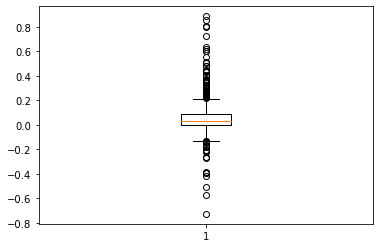

In [36]:
df_train['roa'] = df_train['annual_profit']/df_train['total_assets']
#df_train['debt_to_equity'] = sci.stats.mstats.winsorize(df_train['debt_to_equity'], limits =[0.0, 0.02])
#df_train['debt_to_equity'] = np.where(df_train['debt_to_equity'] > 0, np.log(df_train['debt_to_equity']), 0)
    
print(df_train.roa.describe())
print(df_train.roa)
print(df_train.roa.value_counts()) #46 nulls
plt.boxplot(df_train.roa)
plt.show()

Create a dataframe with single ratios and financial ratios and a heatmap to check for correlation between ratios

          ebit     profit       cash   wc_ratio  ocf_ratio  equity_ratio  \
0   6536077.55  17.468597  16.147368   5.142587   0.065368      0.738567   
1     38140.91  14.247190  13.739044   0.663710  -3.116492      0.389698   
2     89799.80  16.524120  16.028858   3.328108   2.471134      0.000937   
3    584315.02  17.309964  15.745664   3.193566   0.391307      0.592532   
4  25753000.00  18.647458  15.432245   0.102055   1.178664      0.417496   
5     22382.91  10.788846  11.234266  12.899702   0.398513      0.933551   
6  25753000.00  18.494265  16.261546   0.834046   0.265676      0.648681   
7  -6707113.13  17.561125  16.892638   1.483001   2.061521      0.900519   
8   3785872.48  15.625598  12.684087   0.394765   0.044533      0.212951   
9    170487.91  12.659385  10.483650   0.711538   1.406577      0.689870   

   debt_to_equity           roa  
0       -1.042864  1.494000e-01  
1        0.445033  9.655827e-02  
2        5.098516 -2.540307e-17  
3       -1.442608  2.980723

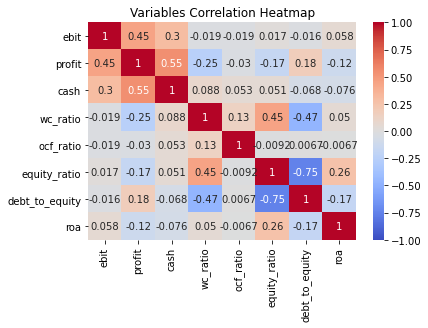

In [37]:
col = ['ebit', 'profit', 'cash', 'wc_ratio', 'ocf_ratio', 'equity_ratio', 'debt_to_equity', 'roa']
data = df_train[col]
print(data.head(10))
print(data.info())

heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm")
heatmap.set_title('Variables Correlation Heatmap')
plt.show()

# Visualize differences in our variables of interest between default and non default 

Here we just want to visualize the difference in our variables of interest between default and non default firms in our training dataset. Also we ran univariate logisitc regression to determine if the ratio is significant in a univariate sense (is not a K.O. criteria).

Our variables of interest are, so the variables we will put in our logistic regression, are :

- Ebit
- Profit
- Cash
- Working Capital Ratio
- Operating Cashflow Ratio
- Equity Ratio
- Debt to Equity Ratio


In [38]:
col_list = ["default","age_cat","ebit","profit","cash","wc_ratio","ocf_ratio","equity_ratio","debt_to_equity","roa"]
df_train[col_list]

,default,age_cat,ebit,profit,cash,wc_ratio,ocf_ratio,equity_ratio,debt_to_equity,roa
0,0,4,6536077.55,17.468597,16.147368,5.142587,0.065368,0.738567,-1.042864,1.494000e-01
1,0,4,38140.91,14.247190,13.739044,0.663710,-3.116492,0.389698,0.445033,9.655827e-02
2,0,4,89799.80,16.524120,16.028858,3.328108,2.471134,0.000937,5.098516,-2.540307e-17
3,0,4,584315.02,17.309964,15.745664,3.193566,0.391307,0.592532,-1.442608,2.980723e-02
4,0,4,25753000.00,18.647458,15.432245,0.102055,1.178664,0.417496,0.284622,2.607926e-02
...,...,...,...,...,...,...,...,...,...,...
664,0,4,374000.00,16.469034,10.341742,0.835583,0.009571,0.182336,1.500602,-2.783753e-03
665,0,3,244694.05,14.653886,12.439314,1.213142,-0.083731,0.341823,0.655182,1.555806e-01
666,0,3,12876951.53,17.578342,13.258707,0.041927,0.032679,0.000000,0.000000,1.289209e-02
667,0,3,9855.87,12.172564,8.639795,0.615002,0.137266,0.000000,0.000000,6.375280e-02


## EBIT

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.008   
Dependent Variable: default          AIC:              293.3010
Date:               2021-01-02 15:08 BIC:              302.3096
No. Observations:   668              Log-Likelihood:   -144.65 
Df Model:           1                LL-Null:          -145.83 
Df Residuals:       666              LLR p-value:      0.12413 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
----------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
----------------------------------------------------------------
Intercept  -2.7386    0.1700  -16.1120  0.0000  -3.0717  -2.4054
ebit       -0.0000    0.0000   -1.3012  0.1932  -0.0000   0.0000



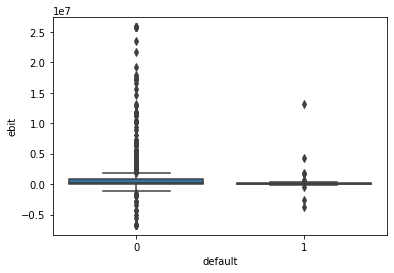

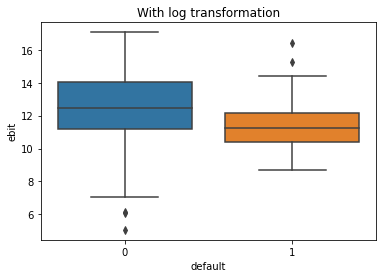

<Figure size 432x288 with 0 Axes>

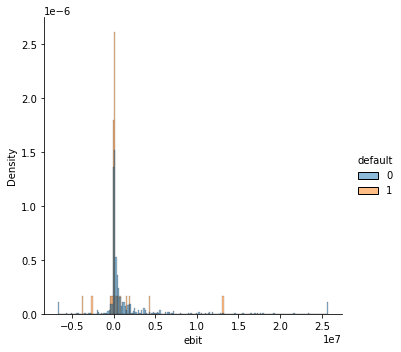

In [39]:
sns.boxplot(y="ebit",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["ebit"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="ebit",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ ebit + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

## Profit

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.013   
Dependent Variable: default          AIC:              291.9579
Date:               2021-01-02 15:09 BIC:              300.9664
No. Observations:   668              Log-Likelihood:   -143.98 
Df Model:           1                LL-Null:          -145.83 
Df Residuals:       666              LLR p-value:      0.054164
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
----------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
----------------------------------------------------------------
Intercept    -0.5964    1.1311  -0.5273  0.5980  -2.8132  1.6204
profit       -0.1540    0.0795  -1.9372  0.0527  -0.3099  0.0018



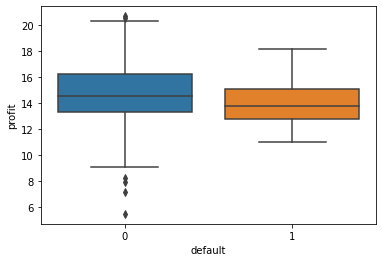

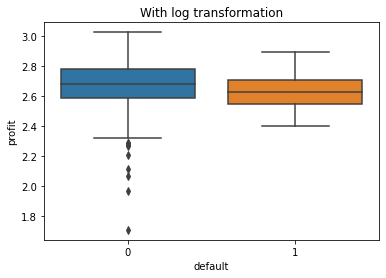

<Figure size 432x288 with 0 Axes>

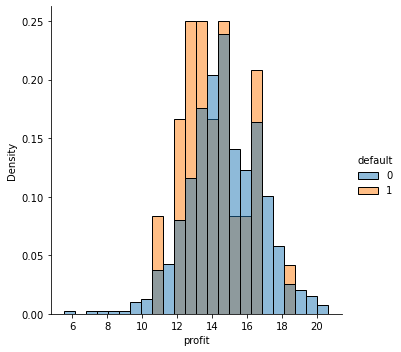

In [40]:
sns.boxplot(y="profit",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["profit"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="profit",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ profit + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

## Cash

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.054     
Dependent Variable: default          AIC:              279.8600  
Date:               2021-01-02 15:09 BIC:              288.8686  
No. Observations:   668              Log-Likelihood:   -137.93   
Df Model:           1                LL-Null:          -145.83   
Df Residuals:       666              LLR p-value:      7.0200e-05
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.4502    0.5679  -0.7928  0.4279  -1.5632   0.6628
cash          -0.2168    0.0540  -4.0159  0.0001  -0.3227  -0.1110



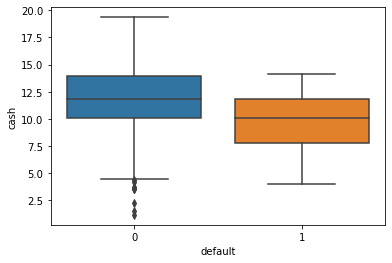

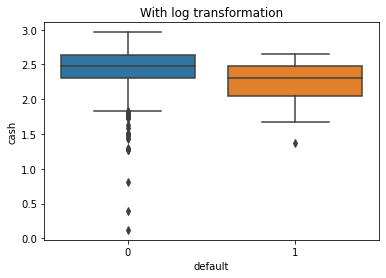

<Figure size 432x288 with 0 Axes>

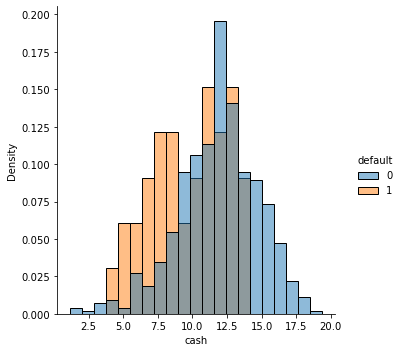

In [41]:
sns.boxplot(y="cash",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["cash"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="cash",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ cash + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

## Working Capital Ratio

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.016   
Dependent Variable: default          AIC:              290.9189
Date:               2021-01-02 15:10 BIC:              299.9275
No. Observations:   668              Log-Likelihood:   -143.46 
Df Model:           1                LL-Null:          -145.83 
Df Residuals:       666              LLR p-value:      0.029357
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     8.0000                                     
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
Intercept   -2.4207    0.2528  -9.5744  0.0000  -2.9162  -1.9252
wc_ratio    -0.2630    0.1530  -1.7196  0.0855  -0.5628   0.0368



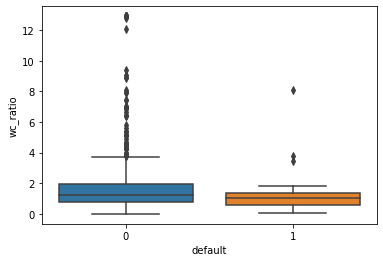

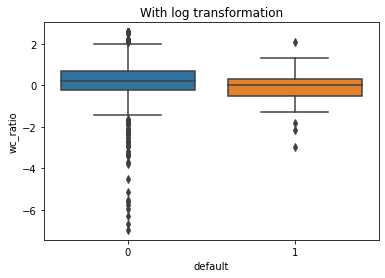

<Figure size 432x288 with 0 Axes>

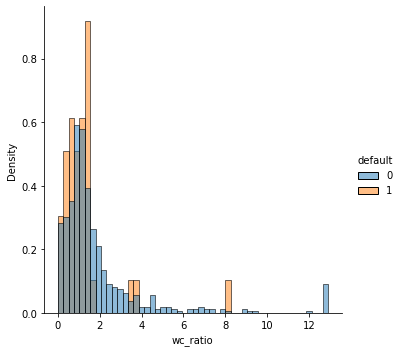

In [44]:
sns.boxplot(y="wc_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["wc_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="wc_ratio",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ wc_ratio + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

## Operating Cash Flow Ratio

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.000   
Dependent Variable: default          AIC:              295.5175
Date:               2021-01-02 15:13 BIC:              304.5231
No. Observations:   667              Log-Likelihood:   -145.76 
Df Model:           1                LL-Null:          -145.77 
Df Residuals:       665              LLR p-value:      0.86080 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
----------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
----------------------------------------------------------------
Intercept  -2.8057    0.1671  -16.7933  0.0000  -3.1332  -2.4783
ocf_ratio  -0.0017    0.0100   -0.1703  0.8648  -0.0213   0.0179



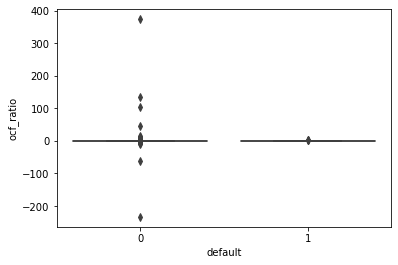

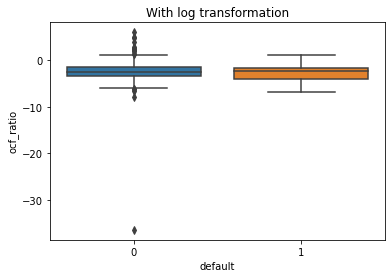

In [51]:
sns.boxplot(y="ocf_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["ocf_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
#plt.figure()
#sns.displot(df_train,x="ocf_ratio",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ ocf_ratio + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

## Equity Ratio 

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.001   
Dependent Variable: default          AIC:              295.2834
Date:               2021-01-02 15:13 BIC:              304.2920
No. Observations:   668              Log-Likelihood:   -145.64 
Df Model:           1                LL-Null:          -145.83 
Df Residuals:       666              LLR p-value:      0.53649 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
Intercept      -2.6900   0.2507 -10.7286 0.0000 -3.1814 -2.1986
equity_ratio   -0.3525   0.5814  -0.6064 0.5443 -1.4919  0.7869



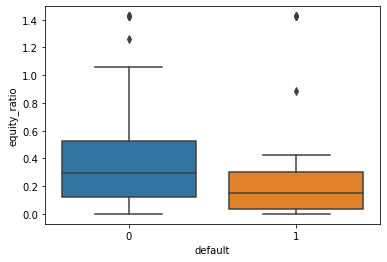

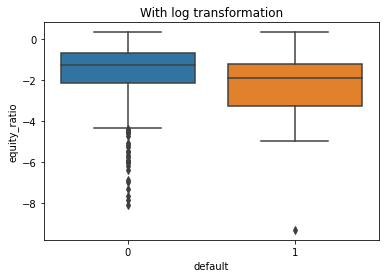

<Figure size 432x288 with 0 Axes>

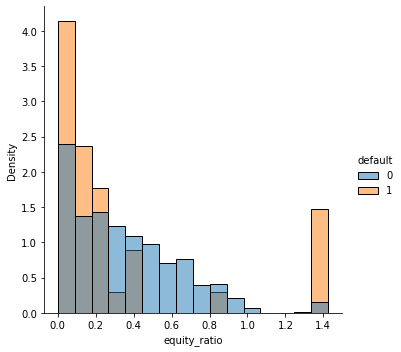

In [52]:
sns.boxplot(y="equity_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["equity_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="equity_ratio",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ equity_ratio + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

In [47]:
pd.crosstab(df_train["default"],df_train["equity_ratio"]==0) #see that 6 defaulted with an equity ratio of 0

equity_ratio,False,True
default,,
0,590,40
1,32,6


## Debt to Equity Ratio

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.008   
Dependent Variable: default          AIC:              293.4549
Date:               2021-01-02 15:12 BIC:              302.4635
No. Observations:   668              Log-Likelihood:   -144.73 
Df Model:           1                LL-Null:          -145.83 
Df Residuals:       666              LLR p-value:      0.13707 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
Intercept      -2.9449   0.1984 -14.8462 0.0000 -3.3337 -2.5562
debt_to_equity  0.1332   0.0869   1.5332 0.1252 -0.0371  0.3035



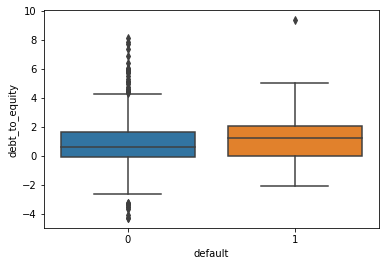

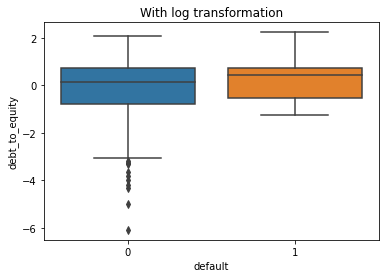

<Figure size 432x288 with 0 Axes>

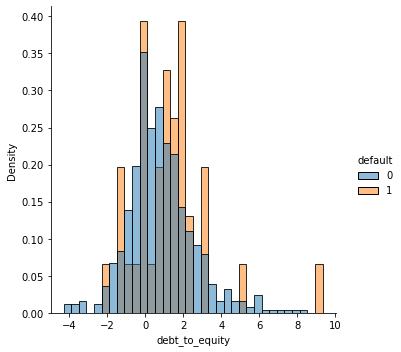

In [48]:
sns.boxplot(y="debt_to_equity",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["debt_to_equity"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="debt_to_equity",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ debt_to_equity + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

# Our Logit Regression

In [78]:
# 'ebit', 'profit', 'cash', 'wc_ratio', 'ocf_ratio', 'equity_ratio', 'debt_to_equity', 'roa'
mdl1 = sm.Logit.from_formula('default ~ age_cat + ebit + wc_ratio + ocf_ratio + equity_ratio + debt_to_equity + roa + 1',
                            data=df_train).fit(disp=False, maxiter=100)
print(mdl1.summary2())

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.040   
Dependent Variable: default          AIC:              295.9733
Date:               2021-01-02 15:16 BIC:              331.9956
No. Observations:   667              Log-Likelihood:   -139.99 
Df Model:           7                LL-Null:          -145.77 
Df Residuals:       659              LLR p-value:      0.11543 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     8.0000                                     
---------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------
Intercept       -4.3928   1.2335 -3.5613 0.0004 -6.8104 -1.9752
age_cat          0.4821   0.3385  1.4240 0.1544 -0.1814  1.1456
ebit            -0.0000   0.0000 -1.2032 0.2289 -0.0000  0.0000
wc_ratio        -0.2412   0.1520 -1.5866 0.1126 -0.5393  0.0568
o

In [79]:
y = df_train["default"]
X = df_train[['age_cat', 'profit', 'ebit', 'wc_ratio', 'ocf_ratio', 'equity_ratio', 'debt_to_equity', 'roa']]
X = X.fillna(0)
X = sm.add_constant(X)


mdl2 = sm.Logit(y,X).fit()
mdl2.summary2()

Optimization terminated successfully.
         Current function value: 0.206480
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Pseudo R-squared: 0.054   
Dependent Variable: default          AIC:              293.8576
Date:               2021-01-02 15:16 BIC:              334.3962
No. Observations:   668              Log-Likelihood:   -137.93 
Df Model:           8                LL-Null:          -145.83 
Df Residuals:       659              LLR p-value:      0.045215
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     8.0000                                     
---------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           -1.5808   1.8058 -0.8754 0.3814 -5.1201  1.9585
age_cat          0.4673   0.3408  1.3713 0.1703 -0.2006  1.1353
profit          -0.1907   0.0926 -2.0592 0.0395 -0.3721 -0.0092
ebit            -0.0000   0.0000 -0.5529 0.5803 -0.0000  0.0000
wc_ratio        -0.2432   0.1411 -1.7237 0.0848 -0.5197  0.0333
ocf_ratio       -0.0007   0.0179 -0.0373 0.9703 -0.0358  0.0345
equity_ratio     0.6779   0.6844  0.9904 0.3220 -0.6636  2.0194
debt_to_equity   0.1455   0.1242  1.1710 0.2416 -0.0980  0.3890
roa             -1.6481   1.2648 -1.3031 0.1926 -4.1271  0.8309
===============================================================

"""

In [80]:
# see how our model would have predicted the defaults 
s = pd.concat([df_train["default"],round(mdl1.predict(X)*100,2)],axis=1,)
s.columns = ["default","estimated PD in %"]
s.sort_values(by="estimated PD in %",ascending=False)

,default,estimated PD in %
409,0,23.03
566,1,20.64
500,0,19.88
416,0,19.05
517,0,17.68
...,...,...
601,0,0.23
258,0,0.23
54,0,0.23
123,0,0.23


In [81]:
s[s["default"] == 1]

,default,estimated PD in %
32,1,2.72
43,1,8.61
69,1,9.90
104,1,10.46
114,1,3.27
120,1,7.02
128,1,7.53
139,1,7.47
150,1,13.35
198,1,3.63


In [82]:
# Splitting data into training and testing sets.
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.2, random_state = 42)
 
# The splited Logit Model
mdl2split = sm.Logit(train_labels,train_features).fit()
mdl2split.summary2()

# Predict the test data
predictions_split = mdl2split.predict(test_features)
# Predict the training data
predictions_split_train = mdl2split.predict(train_features)

# Calculate the absolute errors
errors = abs(predictions_split - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '.')

Optimization terminated successfully.
         Current function value: 0.202540
         Iterations 9
Mean Absolute Error: 0.11 .


Out sample: 
AUC (LY):   0.6220238095238095
GINI (LY):  0.24404761904761907


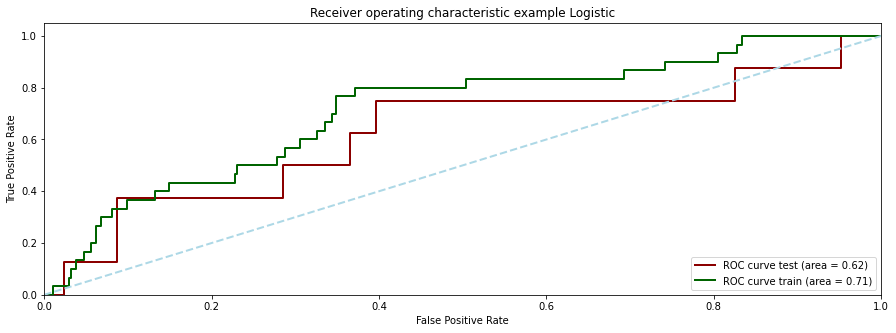

In [83]:
#AUC & Gini Graph + Calculations of splitted logit

fpr_split, tpr_split, thresholds_split = metrics.roc_curve(test_labels, predictions_split)
auc_split = metrics.auc(fpr_split, tpr_split) 

#Predict the in sample (train) data for comparision
fpr_split_train, tpr_split_train, thresholds_split_train = metrics.roc_curve(train_labels, predictions_split_train)
auc_split_train = metrics.auc(fpr_split_train, tpr_split_train)

fig, axes = plt.subplots(figsize=(15,5))
lw = 2
axes = plt.plot(fpr_split, tpr_split, color='darkred',
         lw=lw, label='ROC curve test (area = %0.2f)' % auc_split)
axes = plt.plot(fpr_split_train, tpr_split_train, color='darkgreen',
         lw=lw, label='ROC curve train (area = %0.2f)' % auc_split_train)
axes = plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example Logistic')
plt.legend(loc="lower right")

print("Out sample: ")
print('AUC (LY):  ',auc_split)
print('GINI (LY): ', 2*auc_split -1)

In sample: 
AUC L1:   0.6532163742690059
GINI L1:  0.30643274853801183
AUC L2:   0.6871345029239766
GINI L2:  0.3742690058479532
Splitted Logit Regression
AUC L2:   0.6220238095238095
GINI L2:  0.24404761904761907
Out sample: 
AUC Test Sample:   0.6220238095238095
GINI Test Sample:  0.24404761904761907


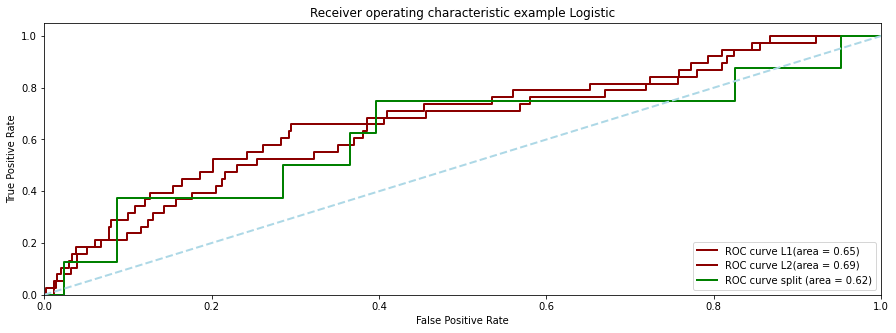

In [84]:
#AUC & Gini Graph + Calculations of old logit regression (red) splitted logit regression (green)
predictions_L1 = mdl1.predict(X)
predictions_L2 = mdl2.predict(X)
#AUC & Gini Graph + Calculations
fpr_L1, tpr_L1, thresholds_L1 = metrics.roc_curve(df_train['default'], predictions_L1)
auc_L1 = metrics.auc(fpr_L1, tpr_L1)

fpr_L2, tpr_L2, thresholds_L2 = metrics.roc_curve(df_train['default'], predictions_L2)
auc_L2 = metrics.auc(fpr_L2, tpr_L2)

fig, axes = plt.subplots(figsize=(15,5))
lw = 2
axes = plt.plot(fpr_L1, tpr_L1, color='darkred',
         lw=lw, label='ROC curve L1(area = %0.2f)' % auc_L1)
axes = plt.plot(fpr_L2, tpr_L2, color='darkred',
         lw=lw, label='ROC curve L2(area = %0.2f)' % auc_L2)
axes = plt.plot(fpr_split, tpr_split, color='green',
         lw=lw, label='ROC curve split (area = %0.2f)' % auc_split)
axes = plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example Logistic')
plt.legend(loc="lower right")

print("In sample: ")
print('AUC L1:  ',auc_L1)
print('GINI L1: ', 2*auc_L1 -1)
print('AUC L2:  ',auc_L2)
print('GINI L2: ', 2*auc_L2 -1)
print('Splitted Logit Regression')
print('AUC L2:  ',auc_split)
print('GINI L2: ', 2*auc_split -1)
print("Out sample: ")
print('AUC Test Sample:  ',auc_split)
print('GINI Test Sample: ', 2*auc_split -1)
# Overfitting wenn man alle Daten nimmt (trotzdem noch nicht gut RF hat AUC von 97 mit splitting). Bei Test Data eher schlechte Performance.

# PD Model preparation

## Dependent variabel: Good/Bad (default) definition

# PD model estimation

# PD model validation

## Out of sample validation (test)
### Evaluation of model performance: accuracy and area under the curve (AUC)
### Evalution of model performance: Gini